<a href="https://colab.research.google.com/github/escape13/deepfried/blob/master/IntroTorch/ClothingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training the neural network

In [1]:
import torch
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms
from torch import optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,), (0.5))])
trainset = datasets.FashionMNIST('FashionMNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Extracting FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST_data/FashionMNIST/raw


Extracting FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST_data/FashionMNIST/raw



Extracting FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST_data/FashionMNIST/raw


Extracting FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST_data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
images, labels = next(iter(trainloader))

model = nn.Sequential(nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 128),
                    nn.ReLU(),
                    nn.Linear(128, 10),
                    nn.LogSoftmax())

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.025)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Training loss: 0.7404202021070635
Training loss: 0.46458703065032897
Training loss: 0.41614601271810814
Training loss: 0.38654225057503305
Training loss: 0.36293377676434607


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


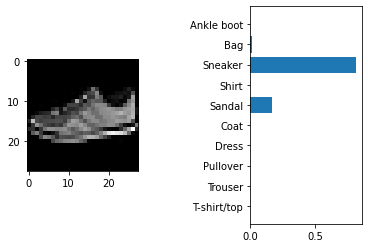

In [4]:
import matplotlib.pyplot as plt

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
    output = model.forward(img)

probs = F.softmax(output, dim=1)

plt.subplot(1, 2, 1)
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=1)
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.barh(names, probs.numpy().squeeze())
plt.yticks(range(10))
plt.show()

## Inference and validation

In [7]:
testdata = datasets.FashionMNIST('FashionMNIST_data_test/', download=True, train=False, transform=transform)

In [8]:
testloader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle=True)

In [14]:
images, labels = next(iter(testloader))
images = images.view(images.shape[0], -1)
ps = torch.exp(model.forward(images))

top_p, top_class = ps.topk(1, dim=1)
top_class[:10, :]

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[2],
        [0],
        [3],
        [0],
        [1],
        [9],
        [3],
        [2],
        [5],
        [4]])

In [29]:
equal = labels.view(*top_class.shape) == top_class
equal = equal.type(torch.FloatTensor)

In [32]:
accuracy = equal.mean()
print(f"Accuracy of the training: {accuracy.item() * 100}%")

Accuracy of the training: 87.5%


In [37]:
accuracy_storage = []
for images, labels in testloader:
    images = images.view(images.shape[0], -1)
    ps = torch.exp(model.forward(images))
    top_p, top_class = ps.topk(1, dim=1)
    equal = labels.view(*top_class.shape) == top_class
    equal = equal.type(torch.FloatTensor)
    accuracy = equal.mean()
    accuracy_storage.append(accuracy.item() * 100)

print(f"Accuracy of the training: {sum(accuracy_storage)/len(accuracy_storage)}%")

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the training: 84.50437898089172%
